# RestaurantRevenuePrediction

- Right now, deciding when and where to open new restaurants is largely a subjective process based on the personal judgement and experience of development teams. This subjective data is difficult to accurately extrapolate across geographies and cultures.  
- New restaurant sites take large investments of time and capital to get up and running and if the wrong site is choosen, the restaurant is closes leading to a losses.  
- Finding a mathematical model to increase the effectiveness of investments in new restaurant sites would allow to invest more in other important business areas.

## Problem Statement
> ### Objective:
To develop a data-driven mathematical model for selecting optimal new restaurant locations, reducing the reliance on subjective judgment, and thereby increasing the success rate of new restaurant openings.

> ### Background:
Currently, the decision-making process for opening new restaurants is predominantly subjective, relying on the personal judgment and experience of development teams. This subjective approach is challenging to standardize and apply consistently across different geographical and cultural contexts. As a result, it leads to varying levels of success and predictability.

> ### About The Dataset:
- **Train Set :** 137 Rows
- **Test Set :** 1000000 Rows

> ### Challenges:

- Subjective Decision-Making: The reliance on personal judgment and experience leads to inconsistent decision-making, which is difficult to replicate and validate across diverse geographies and cultures.
- High Investment and Risk: Opening a new restaurant requires significant time and capital investment. If the chosen location is not optimal, it can result in substantial financial losses and the eventual closure of the restaurant.
- Resource Allocation: Ineffective site selection diverts resources that could be better invested in other critical areas of the business, such as marketing, staff training, and product development.

> ### Goal:
Develop a robust, data-driven mathematical model to enhance the decision-making process for selecting new restaurant locations. The model should utilize relevant data to predict the success of potential sites, thereby reducing the risk of financial loss and enabling more efficient allocation of resources.

> ### Expected Outcomes:

- Standardized Decision-Making: A mathematical model will provide a consistent and replicable framework for site selection, reducing the variability and subjectivity currently inherent in the process.
- Improved Success Rate: By accurately predicting the potential success of new locations, the model will increase the likelihood of profitable restaurant openings and reduce the incidence of closures.
- Optimal Resource Utilization: More effective site selection will free up capital and resources, allowing the business to invest in other essential areas, fostering overall growth and development.

> ### Impact:
Implementing this model will lead to more strategic and informed decisions regarding new restaurant locations, ultimately enhancing the company's financial stability and growth potential. This data-driven approach will empower the development teams to make better-informed decisions, minimizing the risks associated with new restaurant ventures.#



> ### To Ignore the Warnings



In [1]:
import warnings

warnings.filterwarnings('ignore')



> ### Importing the Packages for Data and Visualization



In [2]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
import plotly as ply
import matplotlib.pyplot as plt

# ----- Congifuring Plotly ----- #
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objects as go
import plotly.offline as offline
offline.init_notebook_mode()

Output hidden; open in https://colab.research.google.com to view.



> ### Loading and Reading the Dataset



In [3]:
train = pd.read_csv('./Data/train.csv')
test = pd.read_csv('./Data/test.csv')

In [4]:
print(f"The Shape of the Train set  :  {train.shape}")
print(f"The Shape of the Train set  :  {test.shape}")

The Shape of the Train set  :  (137, 43)
The Shape of the Train set  :  (100000, 42)


In [5]:
df = pd.concat([train, test])

print(f"The Shape of the combined Data set  :  {df.shape}")

The Shape of the combined Data set  :  (100137, 43)


In [6]:
df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [7]:
print(f"Checking the null values on the train set  :  \n{train.isnull().sum()}")

Checking the null values on the train set  :  
Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64


As we can see, there's no null values in the train set. Now let's check the same on the test set.


In [8]:
print(f"Checking the null values on the test set  :  \n{test.isnull().sum()}")

Checking the null values on the test set  :  
Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
dtype: int64


There's no null values on the test set also. Thet's a great news!

In [9]:
print(f"Checking for duplicacies on the main dtaset   :  {df.duplicated().sum()}")

Checking for duplicacies on the main dtaset   :  0


There's no duplicated values also in the dataset.

In [10]:
print("\n")
print("="*50)
print(f"{' IDENTIFYING THE CATEGORICAL AND NUMERICAL VARIABLES ':^50}")
print("="*50)

print("\n")
print("="*50)
print(f"{' All the columns in the train set are :':^50}")
print("="*50)
print(f" \n{train.columns}")

print("\n")
print("="*50)
print(f"{' And the datatypes for all the columns in the train set are :':^50}")
print("="*50)

print(f" \n{train.dtypes}")



 IDENTIFYING THE CATEGORICAL AND NUMERICAL VARIABLES 


      All the columns in the train set are :      
 
Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue'],
      dtype='object')


 And the datatypes for all the columns in the train set are :
 
Id              int64
Open Date      object
City           object
City Group     object
Type           object
P1              int64
P2            float64
P3            float64
P4            float64
P5              int64
P6              int64
P7              int64
P8              int64
P9              int64
P10             int64
P11             int64
P12             int64
P13           float64
P14             int64
P15             int64
P16            

As we can see, there's only 4 Catagorical columns in the whole dataset.

In [11]:
catago_features = [col for col in train.columns if train[col].dtype == 'O']

print(f"All the catagorical columns are : \n{catago_features}")

All the catagorical columns are : 
['Open Date', 'City', 'City Group', 'Type']


In [12]:
numeric_features = [col for col in train.columns if train[col].dtype != 'O']

print(f"All the numerical columns are : \n{numeric_features}")

All the numerical columns are : 
['Id', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'revenue']




> ### Data Visualiztion



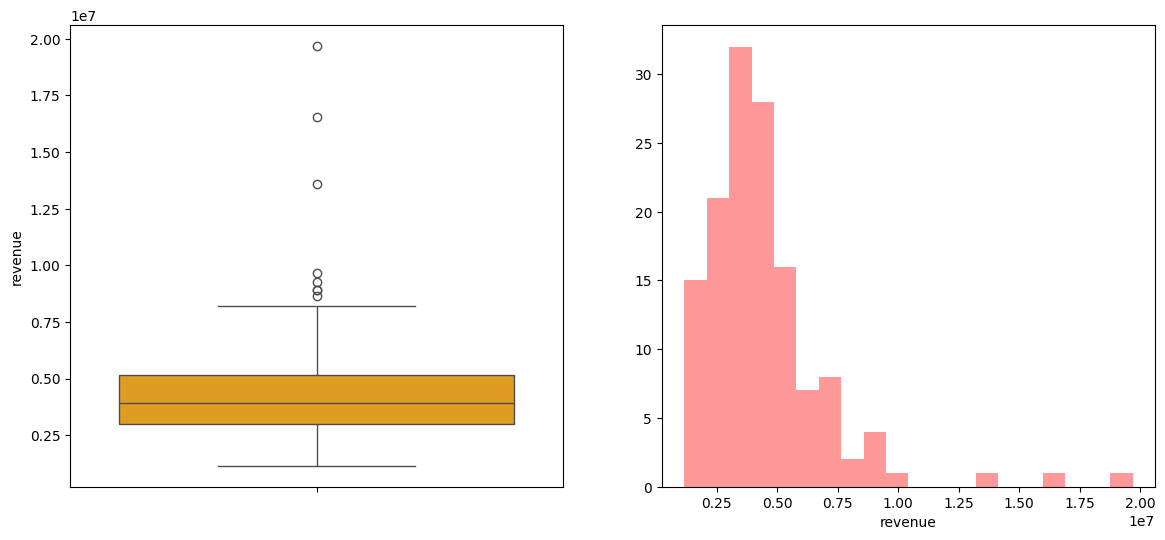

In [13]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(train.revenue, color='orange')

plt.subplot(1, 2, 2)
sns.distplot(train.revenue, bins=20, kde=False, color='red')

plt.show()

In [14]:
# Calculating the lowerbound and upperbound to get the outliers
rev_stat=train.revenue.describe()

print(f"The Revenue Stats are   :   \n{rev_stat}")

# calculationg the interquartile range
iqr = rev_stat['75%'] - rev_stat['25%']
upper = rev_stat['75%'] + 1.5 * iqr
lower = rev_stat['25%'] - 1.5 * iqr

print()
print(f"The upper bounds for suspected outliers are   :  {upper}")
print(f"The lower bounds for suspected outliers are   :  {lower}")

The Revenue Stats are   :   
count    1.370000e+02
mean     4.453533e+06
std      2.576072e+06
min      1.149870e+06
25%      2.999068e+06
50%      3.939804e+06
75%      5.166635e+06
max      1.969694e+07
Name: revenue, dtype: float64

The upper bounds for suspected outliers are   :  8417985.5
The lower bounds for suspected outliers are   :  -252282.5


In [15]:
train[train.revenue > upper]

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
16,16,01/07/2000,İstanbul,Big Cities,FC,3,5.0,4.0,4.0,2,...,2.0,0,0,0,0,0,0,0,0,19696939.0
24,24,09/20/2009,İstanbul,Big Cities,IL,5,5.0,3.0,5.0,2,...,2.0,5,5,4,4,4,4,5,2,8904084.0
49,49,04/01/2008,İstanbul,Big Cities,FC,12,7.5,6.0,6.0,2,...,7.5,0,0,0,0,0,0,0,0,8630682.0
75,75,10/15/2005,İstanbul,Big Cities,FC,5,5.0,4.0,5.0,1,...,0.0,0,0,0,0,0,0,0,0,16549064.0
99,99,12/18/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,1.0,5,5,4,2,5,5,5,3,13575224.0
100,100,09/21/2007,İstanbul,Big Cities,FC,3,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9652350.0
116,116,03/30/2012,İzmir,Big Cities,FC,2,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,8894598.0
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754.0


As we can see, there's 8 rows which are coming under outliers

In [16]:
train_date = train['Open Date'].str.split('/', n = 2, expand=True)
train['month'] = train_date[0]
train['days'] = train_date[1]
train['year'] = train_date[2]

test_date = test['Open Date'].str.split('/', n = 2, expand=True)
test['month'] = test_date[0]
test['days'] = test_date[1]
test['year'] = test_date[2]


In [17]:
train['month'].head(5)

0    07
1    02
2    03
3    02
4    05
Name: month, dtype: object

In [18]:
test['year'].head(5)

0    2011
1    2011
2    2013
3    2013
4    2013
Name: year, dtype: object

In [19]:
# Function to plot categorical features

def featureCatagoricalPlot(col):

  plt.figure(figsize=(20,5))
  i=1

  if not train[col].dtype.name == 'int64' and not train[col].dtype.name == 'float64':
    plt.subplot(1, 2, i)
    sns.boxplot(x=col, y='revenue', data=train)
    plt.xticks(rotation=60)
    plt.ylabel('Revenue')
    i+=1
    plt.subplot(1, 2, i)
    mean = train.groupby(col)['revenue'].mean()
    label = mean.sort_values().index.tolist()
    train[col] = train[col].astype('category')
    train[col].cat.reorder_categories(label, ordered=True)
    train[col].value_counts().plot()
    plt.xticks(rotation=60)
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.show()

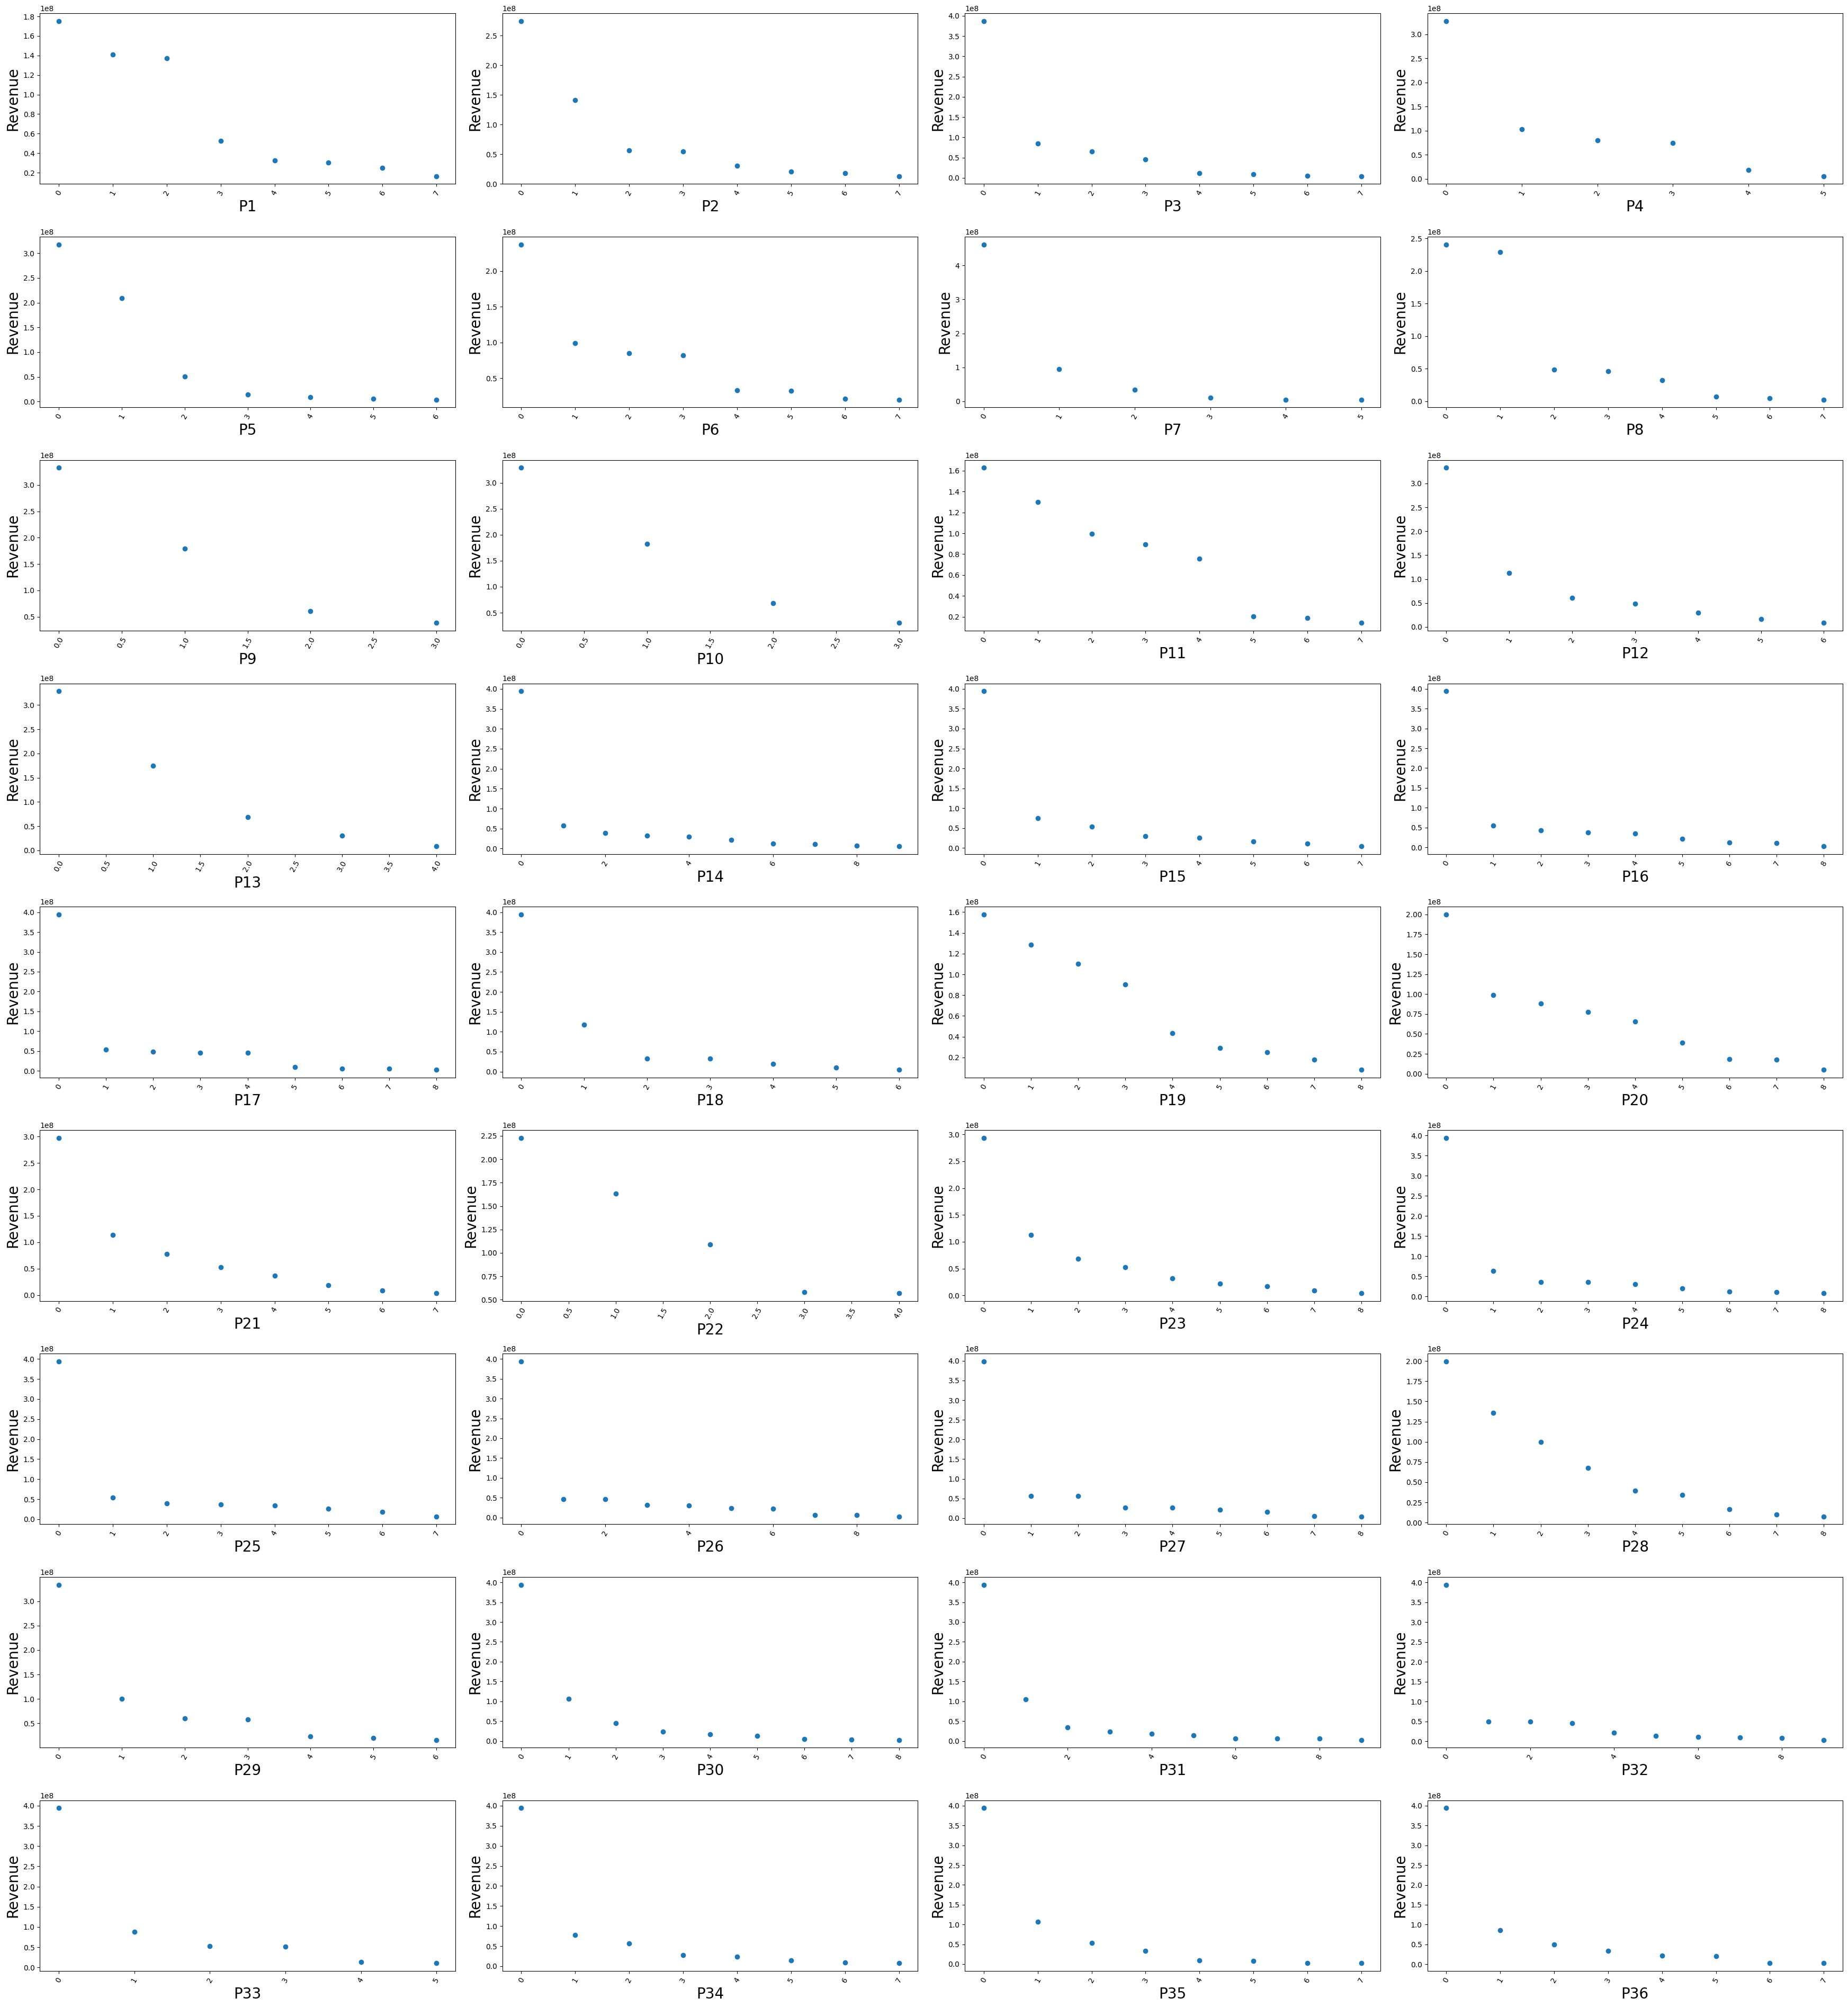

In [20]:
# Function to plot numerical features

def numFeaturePlot():

  features = (train.loc[:,'P1':'P37']).columns.tolist()

  plt.figure(figsize=(35, 38))
  j=1
  while j<len(features):
    col = features[j-1]
    plt.subplot(9, 4, j)
    sorted_grp = train.groupby(col)['revenue'].sum().sort_values(ascending=False).reset_index()
    x_val = sorted_grp.index
    y_val = sorted_grp['revenue'].values
    plt.scatter(x_val, y_val)
    plt.xticks(rotation=60)
    plt.xlabel(col, fontsize=20)
    plt.ylabel('Revenue', fontsize=20)
    j+=1

  plt.tight_layout()
  plt.show()


numFeaturePlot()

As we can see, almost all the variables shows a downwords trend.

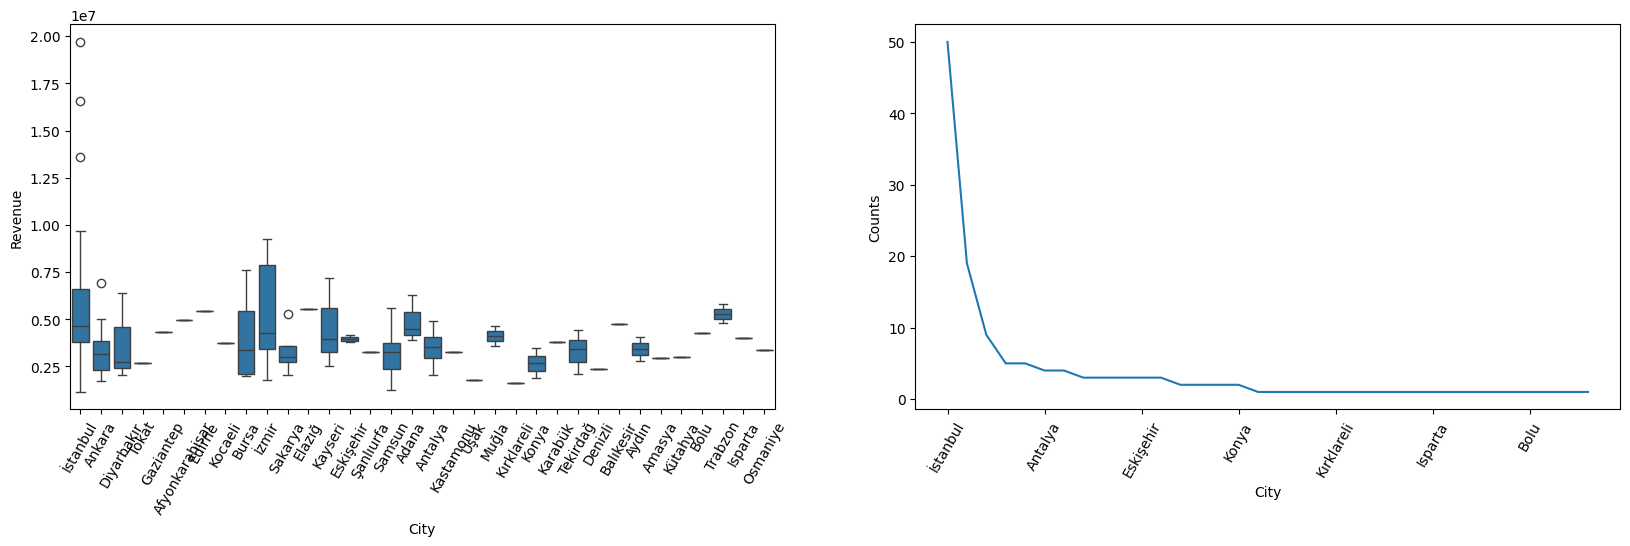

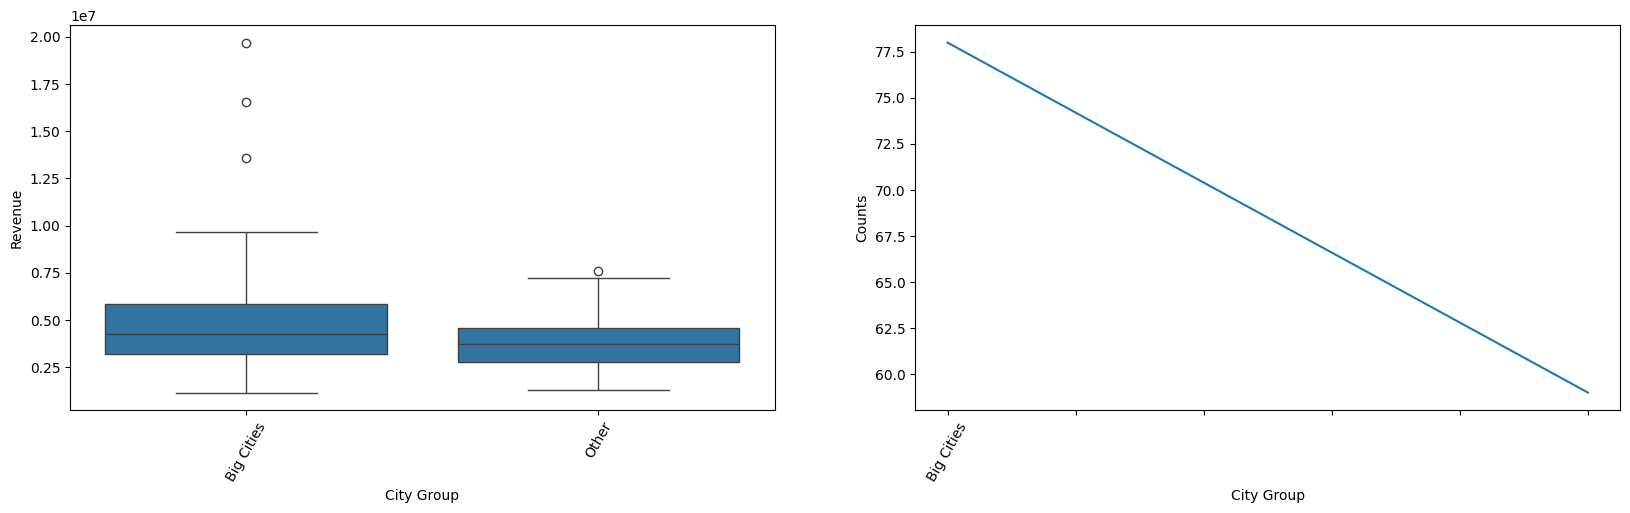

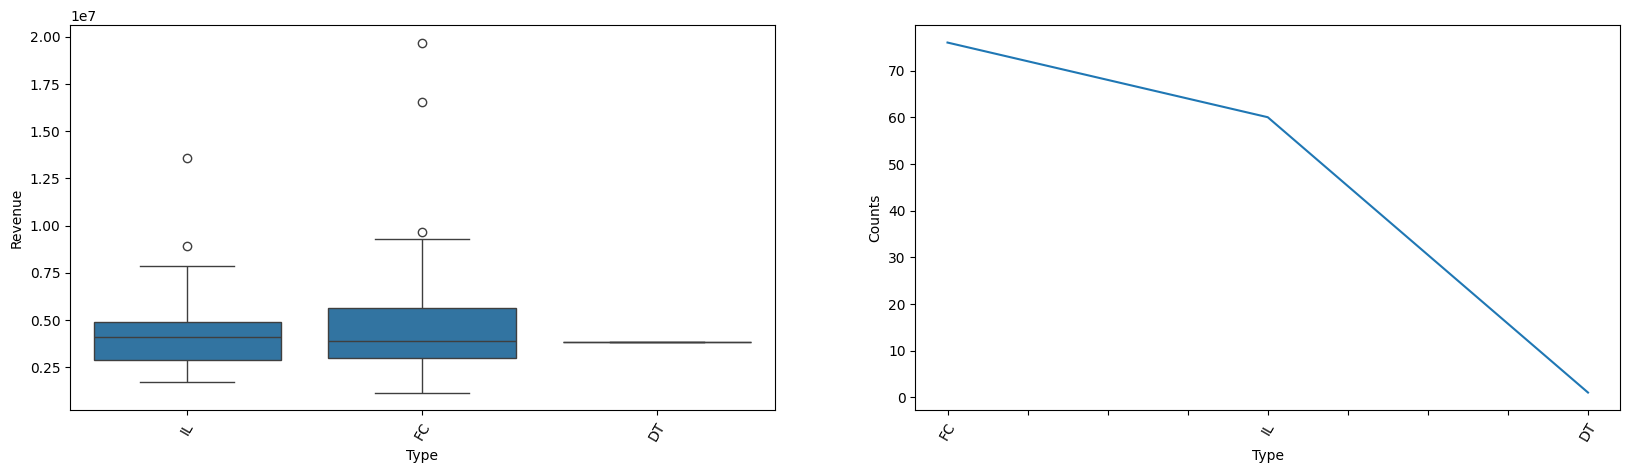

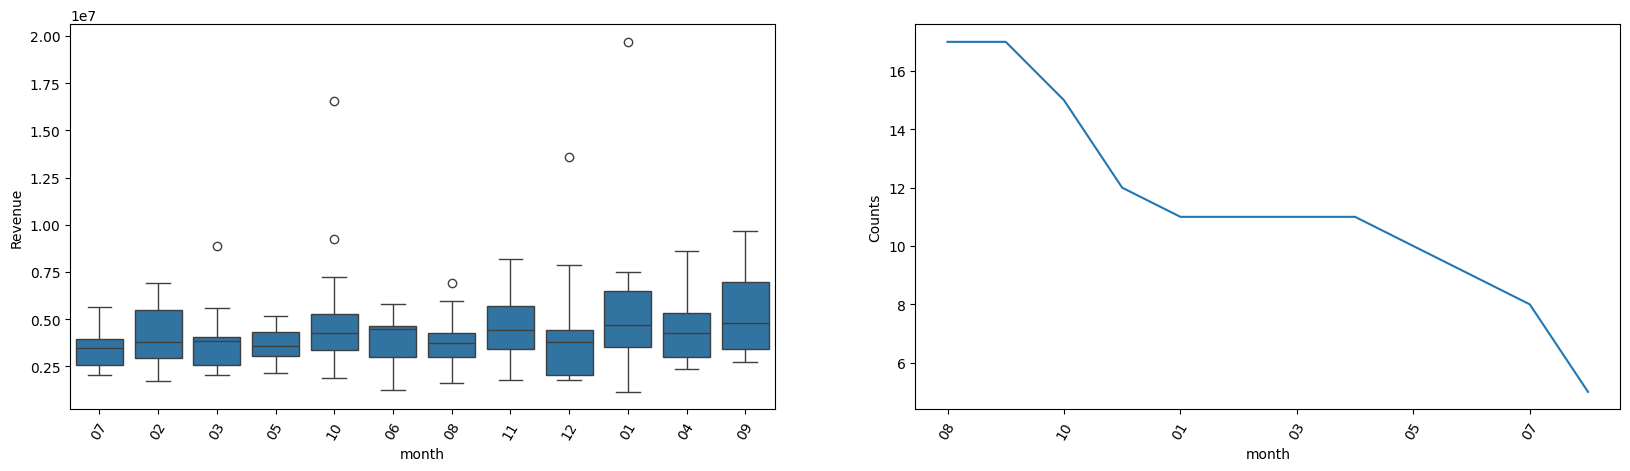

In [21]:
for feature in catago_features:
  if feature != 'Open Date':
    featureCatagoricalPlot(feature)

featureCatagoricalPlot('month')

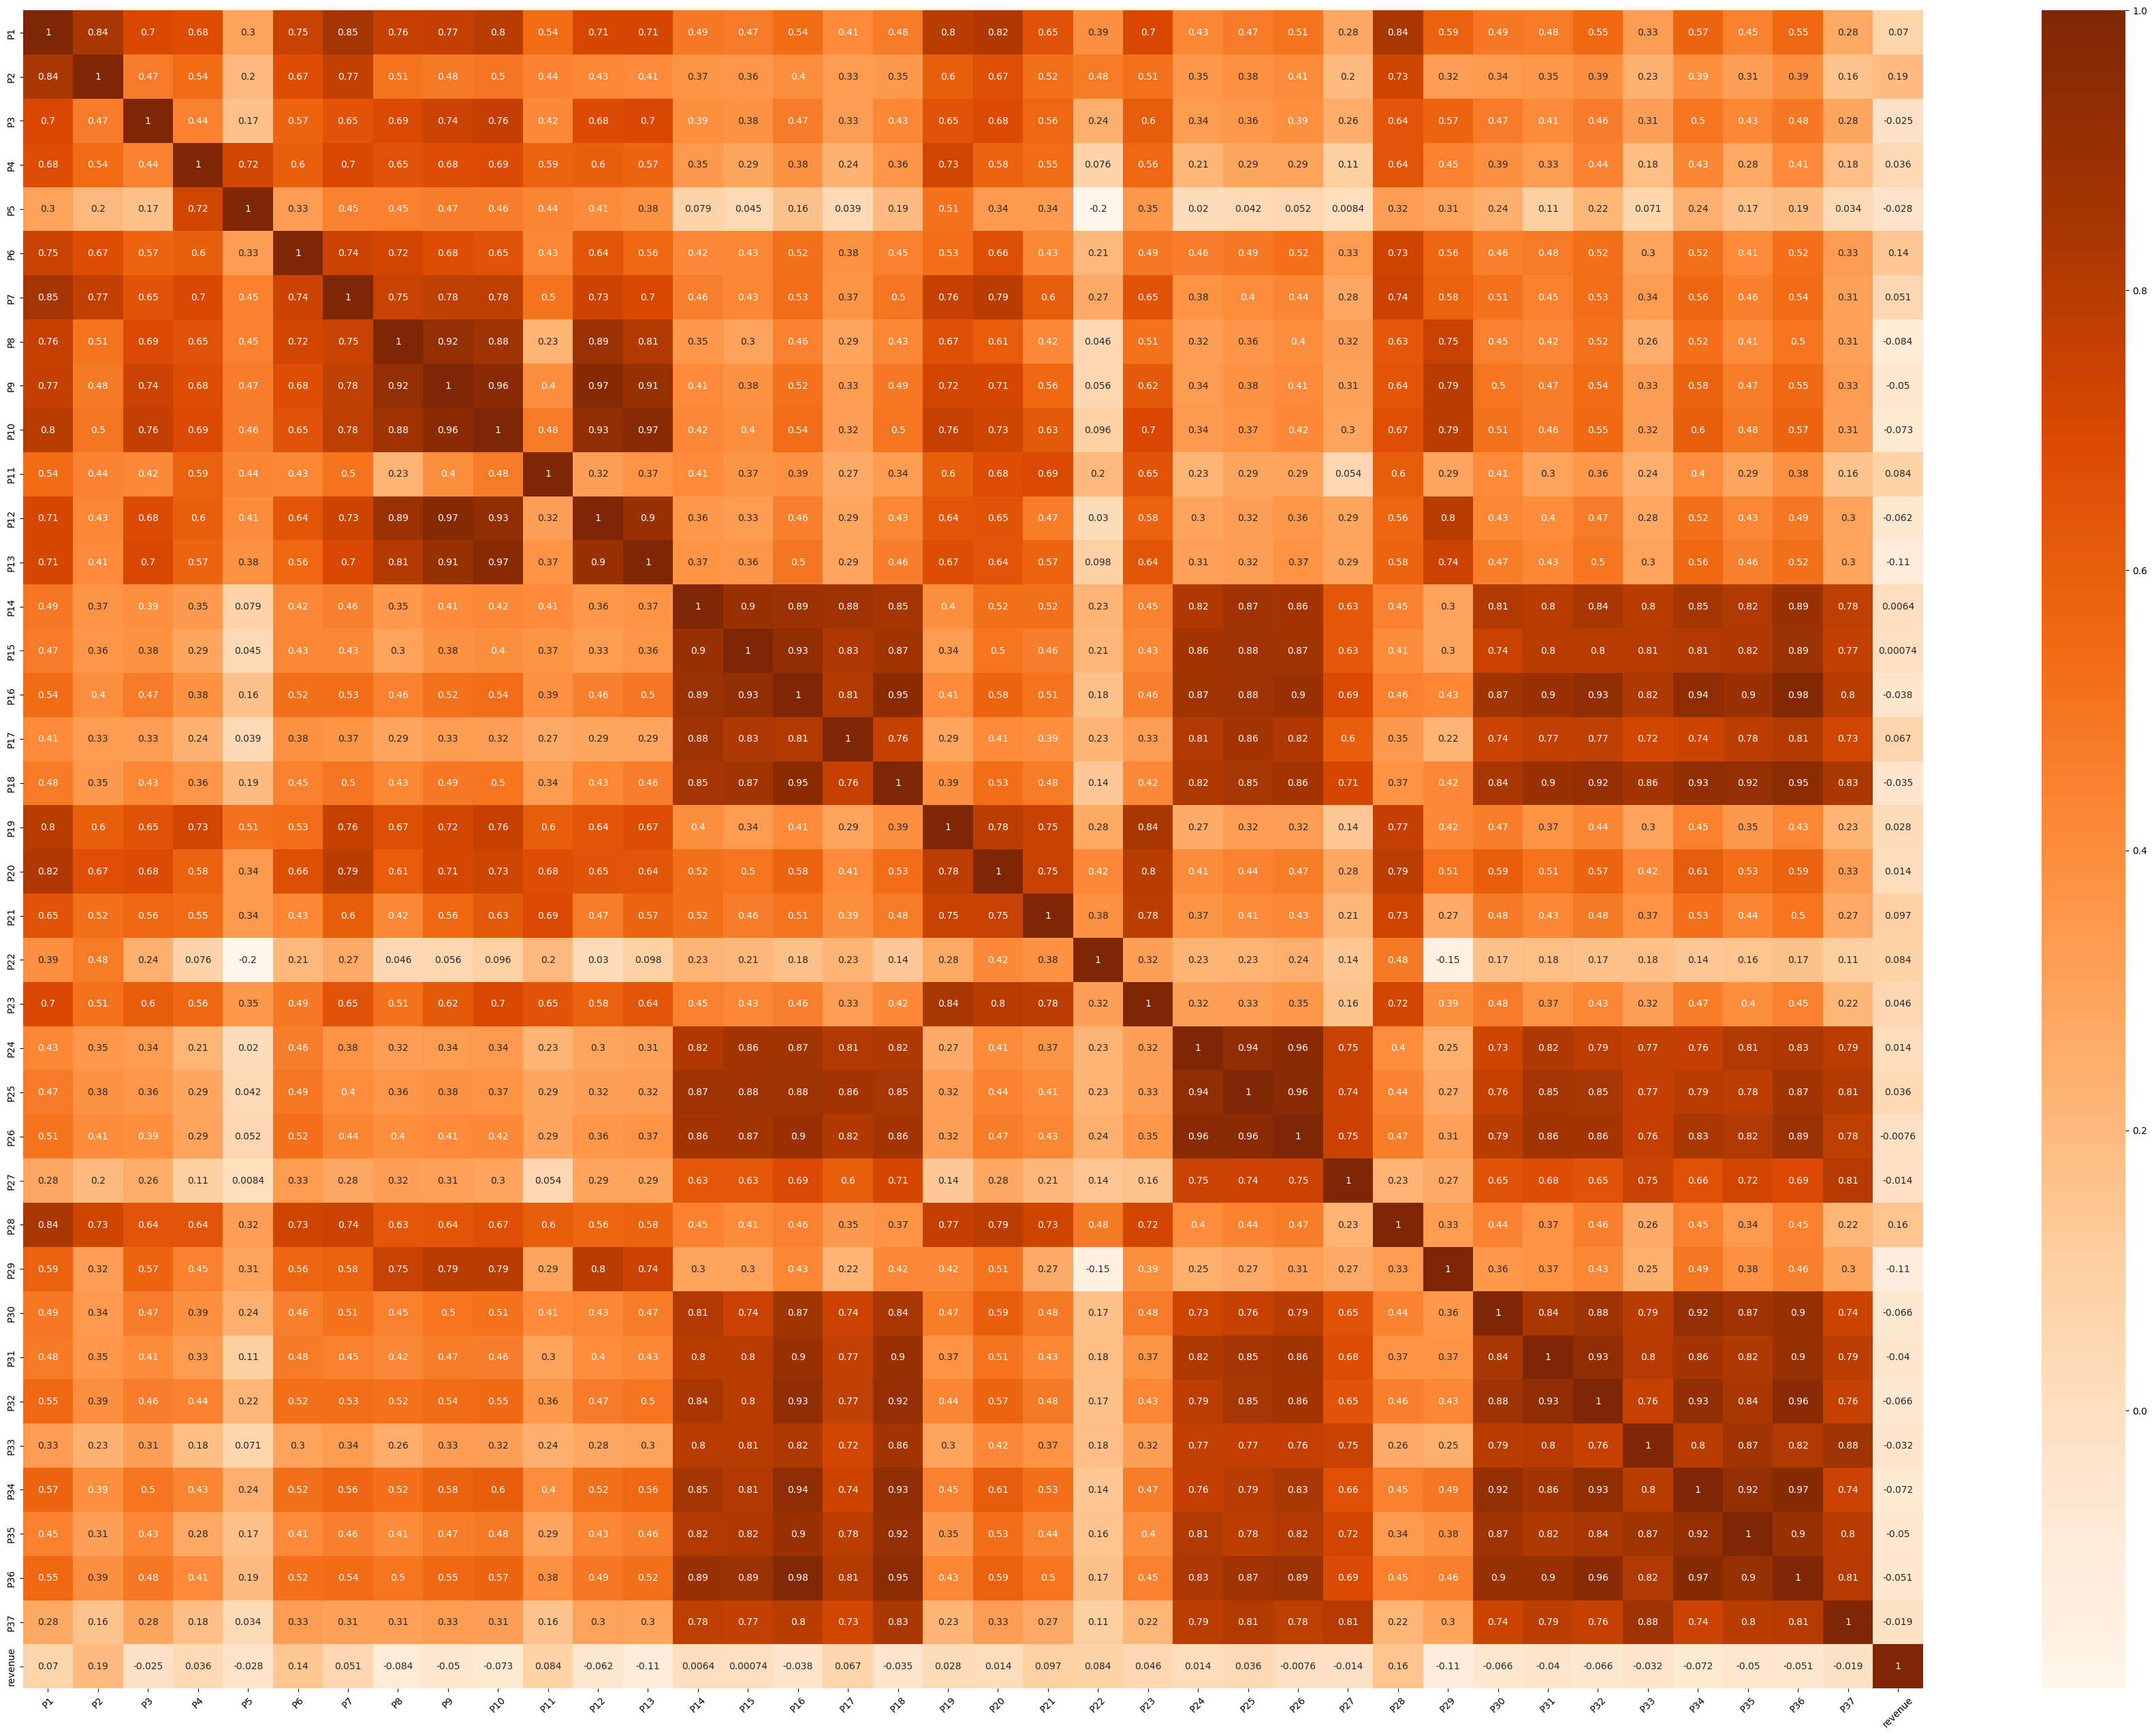

In [22]:
# Plotting heatmap between revenue and P variables

fig = plt.figure(figsize=(45, 32))
features=(train.loc[:, 'P1': 'P37']).columns.tolist()
sns.heatmap(train[features+['revenue']].corr(), cmap='Oranges', annot=True)
plt.xticks(rotation=45)
plt.show()

As we can see, there's few highly  co-relted features available there. And as we know **if a feature is highly co-related with other feature, we should only consider one feature**.

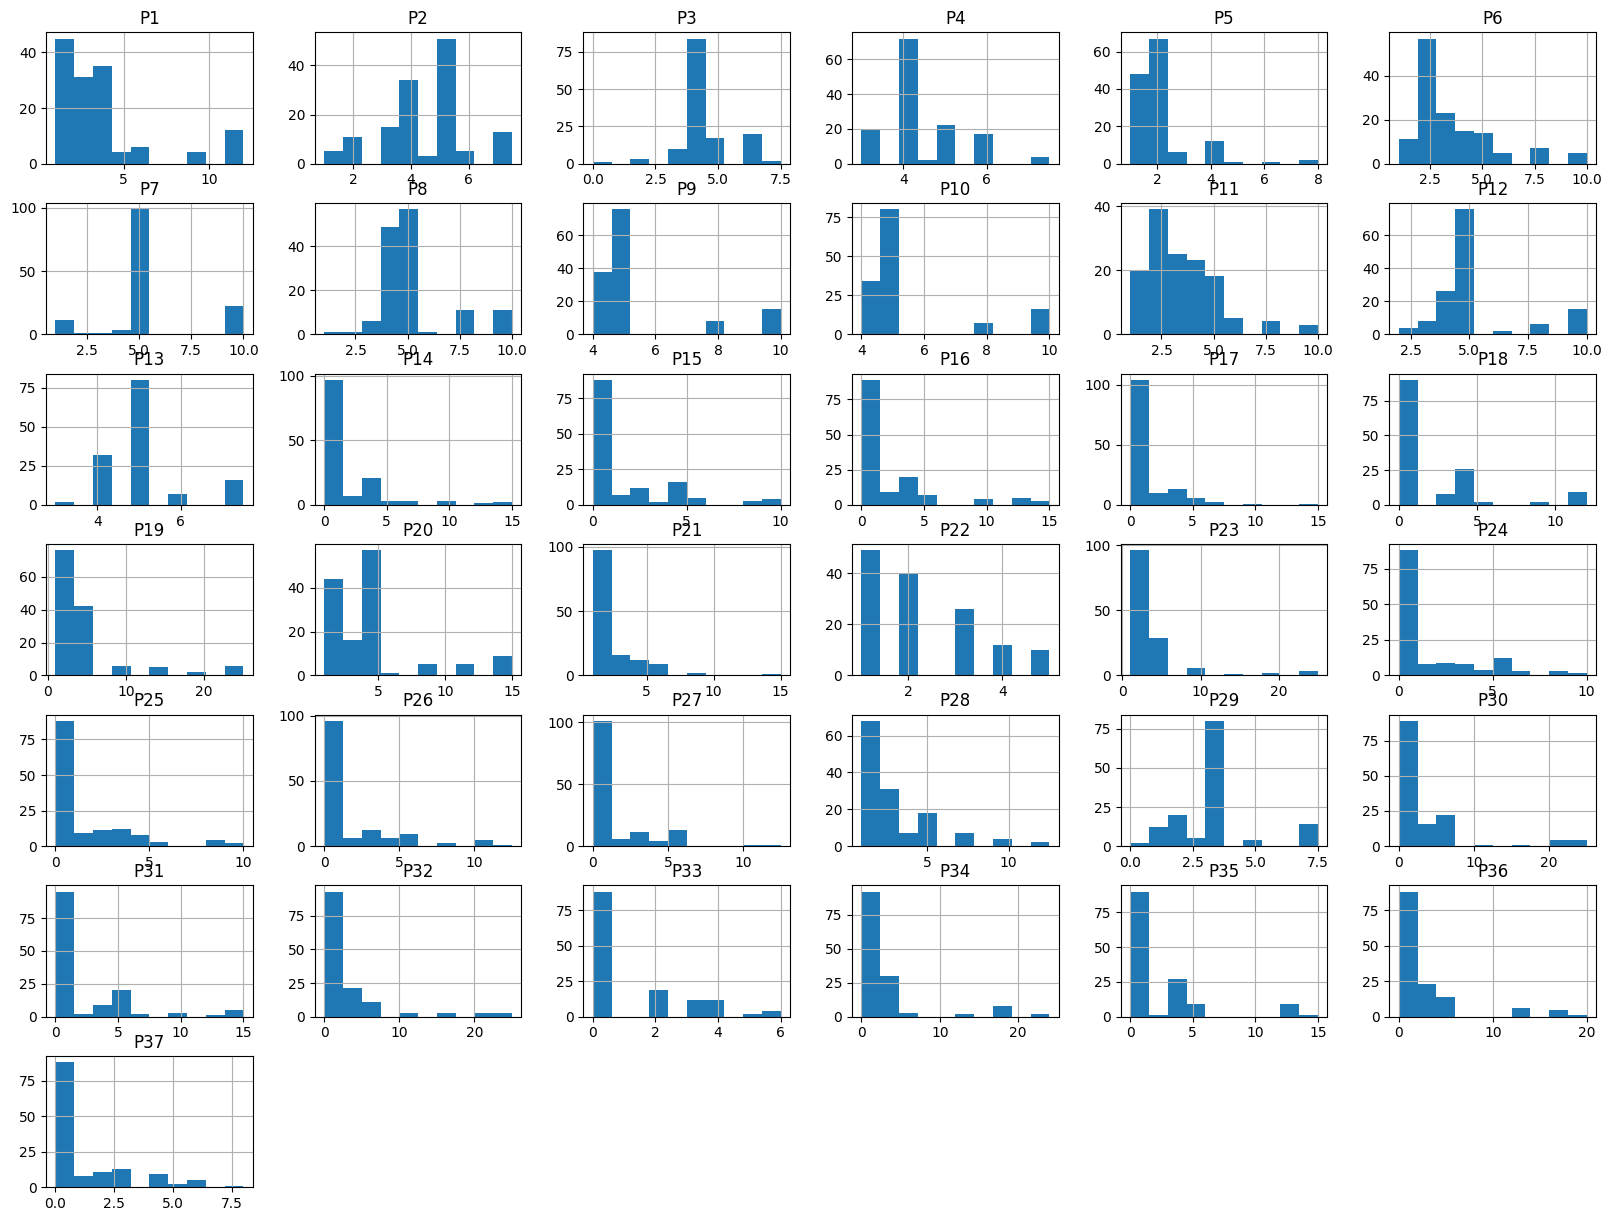

In [23]:
features = (train.loc[:, 'P1' : 'P37']).columns.tolist()
train[features].hist(figsize=(20,15))
plt.show()



> ### Feature Engineering



In [24]:
# Squre root of the p variables
ntrain = np.sqrt(train.loc[:,'P1':'P37'])
ntest = np.sqrt(test.loc[:, 'P1': 'P37'])

col_train = ntrain.columns
col_test = ntest.columns

ntrain.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,2.000000,2.236068,2.000000,2.000000,1.414214,1.414214,2.236068,2.000000,2.236068,2.236068,...,1.414214,1.732051,2.236068,1.732051,2.000000,2.236068,2.236068,2.000000,1.732051,2.000000
1,2.000000,2.236068,2.000000,2.000000,1.000000,1.414214,2.236068,2.236068,2.236068,2.236068,...,1.732051,1.732051,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1.414214,2.000000,1.414214,2.236068,1.414214,1.732051,2.236068,2.236068,2.236068,2.236068,...,1.000000,1.732051,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2.449490,2.121320,2.449490,2.449490,2.000000,2.000000,3.162278,2.828427,3.162278,3.162278,...,1.581139,2.738613,5.000000,3.464102,3.162278,2.449490,4.242641,3.464102,3.464102,2.449490
4,1.732051,2.000000,1.732051,2.000000,1.414214,1.414214,2.236068,2.236068,2.236068,2.236068,...,1.000000,1.732051,2.236068,1.000000,1.732051,1.414214,1.732051,2.000000,1.732051,1.732051


In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
SS = StandardScaler()

ntrain = SS.fit_transform(ntrain)
ntest = SS.fit_transform(ntest)

ntrain = pd.DataFrame(ntrain, columns=col_train)
ntest = pd.DataFrame(ntest, columns=col_test)

ntrain.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0.154045,0.446850,-0.201271,-0.333476,0.124617,-0.654496,-0.067010,-0.626121,-0.199544,-0.225338,...,-0.517620,0.050993,0.959953,0.823025,0.848783,1.863596,1.039680,1.013553,0.728835,1.610808
1,0.154045,0.446850,-0.201271,-0.333476,-1.005005,-0.654496,-0.067010,-0.005152,-0.199544,-0.225338,...,0.048149,0.050993,-0.666273,-0.680541,-0.657091,-0.726484,-0.653264,-0.701287,-0.678804,-0.707522
2,-0.783627,-0.166776,-2.238525,0.677030,0.124617,-0.046356,-0.067010,-0.005152,-0.199544,-0.225338,...,-1.254944,0.050993,-0.666273,-0.680541,-0.657091,-0.726484,-0.653264,-0.701287,-0.678804,-0.707522
3,0.873546,0.148580,1.361969,1.590598,1.722145,0.466330,1.724665,1.553030,2.421213,2.388412,...,-0.220484,2.213252,2.970080,2.326591,1.723905,2.110807,2.558871,2.268904,2.136474,2.131841
4,-0.274863,-0.166776,-1.133147,-0.333476,0.124617,-0.654496,-0.067010,-0.005152,-0.199544,-0.225338,...,-1.254944,0.050993,0.959953,0.187543,0.647034,0.911627,0.658085,1.013553,0.728835,1.300210


In [27]:
train = train[train.columns[train.columns.isin(['Id', 'City', 'City Group', 'Type', 'month', 'days', 'year', 'revenue'])]]
train = pd.concat([train, ntrain], axis=1)

test = test[test.columns[test.columns.isin(['Id', 'City', 'City Group', 'Type', 'month', 'days', 'year', 'revenue'])]]
test = pd.concat([test, ntest], axis=1)

train.head(5)

,Id,City,City Group,Type,revenue,month,days,year,P1,P2,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,İstanbul,Big Cities,IL,5653753.0,07,17,1999,0.154045,0.446850,...,-0.517620,0.050993,0.959953,0.823025,0.848783,1.863596,1.039680,1.013553,0.728835,1.610808
1,1,Ankara,Big Cities,FC,6923131.0,02,14,2008,0.154045,0.446850,...,0.048149,0.050993,-0.666273,-0.680541,-0.657091,-0.726484,-0.653264,-0.701287,-0.678804,-0.707522
2,2,Diyarbakır,Other,IL,2055379.0,03,09,2013,-0.783627,-0.166776,...,-1.254944,0.050993,-0.666273,-0.680541,-0.657091,-0.726484,-0.653264,-0.701287,-0.678804,-0.707522
3,3,Tokat,Other,IL,2675511.0,02,02,2012,0.873546,0.148580,...,-0.220484,2.213252,2.970080,2.326591,1.723905,2.110807,2.558871,2.268904,2.136474,2.131841
4,4,Gaziantep,Other,IL,4316715.0,05,09,2009,-0.274863,-0.166776,...,-1.254944,0.050993,0.959953,0.187543,0.647034,0.911627,0.658085,1.013553,0.728835,1.300210


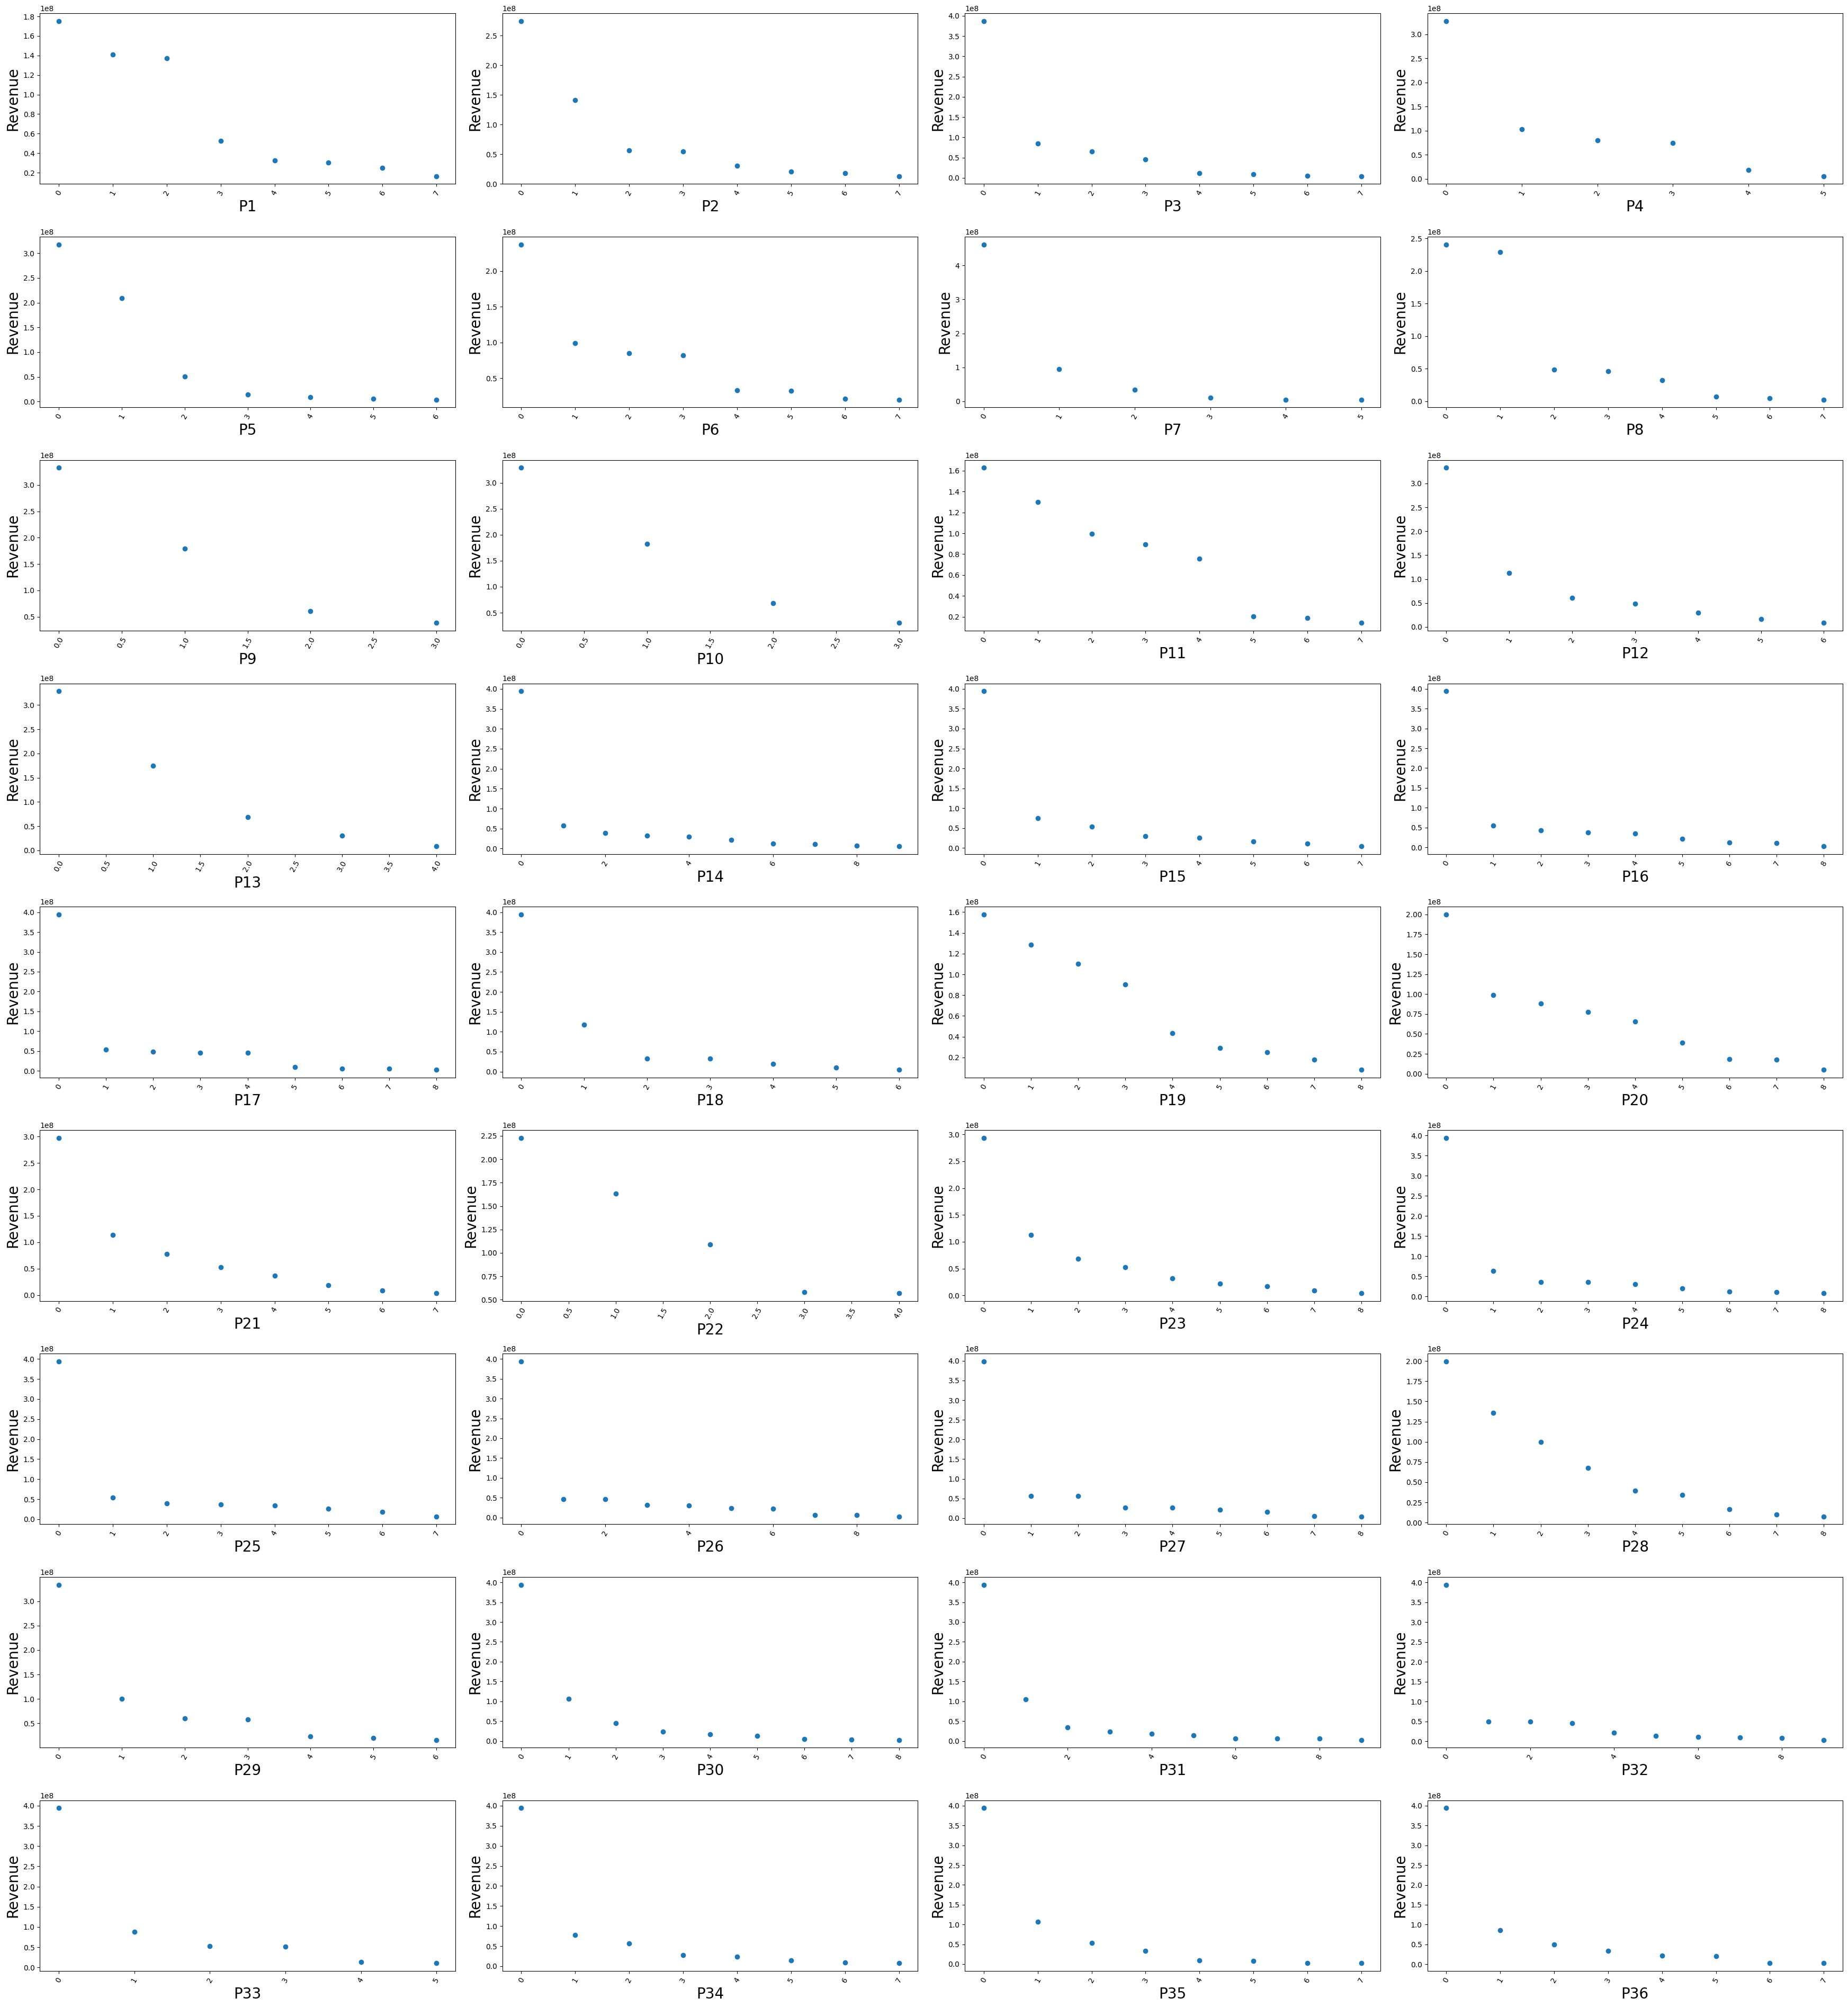

In [28]:
numFeaturePlot()

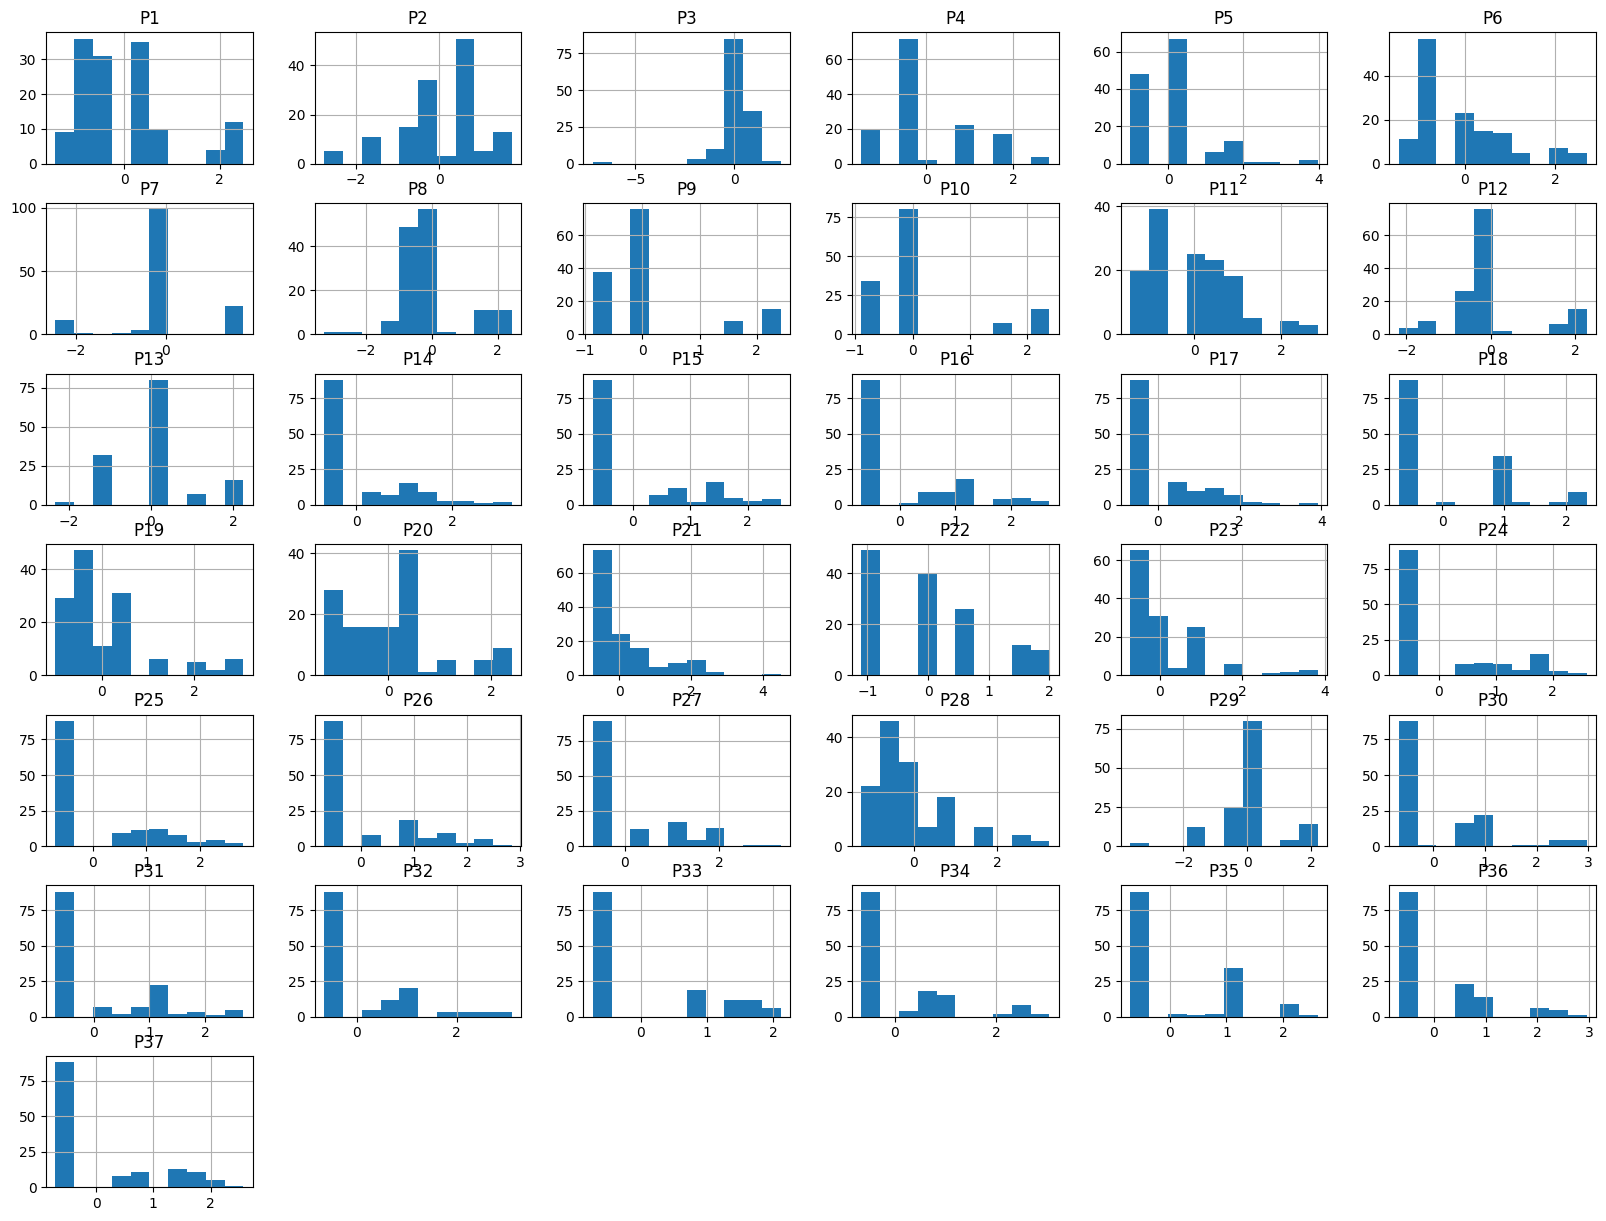

In [29]:
features = (train.loc[:,'P1':'P37']).columns.tolist()
train[features].hist(figsize=(20,15))
plt.show()

In [30]:
city = train.groupby('City')['revenue'].agg(['size', 'count', 'min', 'max', 'mean'])
city.columns = ['no.Of Rows', 'rows with revenue', 'min', 'max', 'average revenue']

x = city.index[:10]
city_x = [x * 1.0 for x, _ in enumerate(x)]
y_tr = city['no.Of Rows'][:10]
y_rr = city['rows with revenue'][:10]
y_min = city['min'][:10]
y_max = city['max'][:10]
y_avg = city['average revenue'][:10]

city.head(10)

,no.Of Rows,rows with revenue,min,max,average revenue
City,,,,,
Adana,3,3,3903884.0,6313221.0,4.894944e+06
Afyonkarahisar,1,1,4952497.0,4952497.0,4.952497e+06
Amasya,1,1,2954086.0,2954086.0,2.954086e+06
Ankara,19,19,1734634.0,6923131.0,3.275406e+06
Antalya,4,4,2025297.0,4888774.0,3.481448e+06
Aydın,2,2,2792031.0,4067566.0,3.429798e+06
Balıkesir,1,1,4758476.0,4758476.0,4.758476e+06
Bolu,1,1,4263629.0,4263629.0,4.263629e+06
Bursa,5,5,1999097.0,7592272.0,4.092295e+06




> ### Model Training and Performance Evaluation



In [31]:
#! pip install catboost

In [32]:
from math import sqrt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import (GridSearchCV, RandomizedSearchCV)
from sklearn.metrics import (mean_squared_error, mean_absolute_error)

from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, LogisticRegression

from xgboost import XGBRFRegressor

# from catboost import CatBoostRegressor

import lightgbm as LGB

In [33]:
X_train = train.drop(columns=['revenue'], axis=1)
y_train = train['revenue']

X_test = test

In [34]:
X_train.head()

,Id,City,City Group,Type,month,days,year,P1,P2,P3,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,İstanbul,Big Cities,IL,07,17,1999,0.154045,0.446850,-0.201271,...,-0.517620,0.050993,0.959953,0.823025,0.848783,1.863596,1.039680,1.013553,0.728835,1.610808
1,1,Ankara,Big Cities,FC,02,14,2008,0.154045,0.446850,-0.201271,...,0.048149,0.050993,-0.666273,-0.680541,-0.657091,-0.726484,-0.653264,-0.701287,-0.678804,-0.707522
2,2,Diyarbakır,Other,IL,03,09,2013,-0.783627,-0.166776,-2.238525,...,-1.254944,0.050993,-0.666273,-0.680541,-0.657091,-0.726484,-0.653264,-0.701287,-0.678804,-0.707522
3,3,Tokat,Other,IL,02,02,2012,0.873546,0.148580,1.361969,...,-0.220484,2.213252,2.970080,2.326591,1.723905,2.110807,2.558871,2.268904,2.136474,2.131841
4,4,Gaziantep,Other,IL,05,09,2009,-0.274863,-0.166776,-1.133147,...,-1.254944,0.050993,0.959953,0.187543,0.647034,0.911627,0.658085,1.013553,0.728835,1.300210


In [35]:
print(f"The Shape Of X_train  :  {X_train.shape}")
print(f"The Shape Of y_train  :  {y_train.shape}")
print(f"The Shape Of X_test  :  {X_test.shape}")

The Shape Of X_train  :  (137, 44)
The Shape Of y_train  :  (137,)
The Shape Of X_test  :  (100000, 44)


In [36]:
type(X_train)

pandas.core.frame.DataFrame

In [37]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [38]:
LE = LabelEncoder()

for col in X_train.columns:
  if((X_train[col].dtype.name == 'object') or (X_train[col].dtype.name == 'category')):
    X_train[col] = LE.fit_transform(X_train[col])
    X_test[col] = LE.fit_transform(X_test[col])


In [39]:
X_train.head()

,Id,City,City Group,Type,month,days,year,P1,P2,P3,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,31,0,2,6,16,3,0.154045,0.446850,-0.201271,...,-0.517620,0.050993,0.959953,0.823025,0.848783,1.863596,1.039680,1.013553,0.728835,1.610808
1,1,3,0,1,1,13,10,0.154045,0.446850,-0.201271,...,0.048149,0.050993,-0.666273,-0.680541,-0.657091,-0.726484,-0.653264,-0.701287,-0.678804,-0.707522
2,2,10,1,2,2,8,15,-0.783627,-0.166776,-2.238525,...,-1.254944,0.050993,-0.666273,-0.680541,-0.657091,-0.726484,-0.653264,-0.701287,-0.678804,-0.707522
3,3,28,1,2,1,1,14,0.873546,0.148580,1.361969,...,-0.220484,2.213252,2.970080,2.326591,1.723905,2.110807,2.558871,2.268904,2.136474,2.131841
4,4,14,1,2,4,8,11,-0.274863,-0.166776,-1.133147,...,-1.254944,0.050993,0.959953,0.187543,0.647034,0.911627,0.658085,1.013553,0.728835,1.300210


In [40]:
test_lablel = pd.read_csv('./Data/sampleSubmission.csv')

test_lablel.head(10)

,Id,Prediction
0,0,4453532.6
1,1,4453532.6
2,2,4453532.6
3,3,4453532.6
4,4,4453532.6
5,5,4453532.6
6,6,4453532.6
7,7,4453532.6
8,8,4453532.6
9,9,4453532.6


In [41]:
mse_list = dict()
glob_pred = []

def FitModel(X, y, model_name, model_algo, gridSearchParams, cv):
  """
    Fits a machine learning model using GridSearchCV and evaluates its
    performance.

    Parameters:
    X (array-like or DataFrame): Features dataset.
    y (array-like or Series): Target labels.
    model_name (str): Name of the model.
    model_algo (estimator object): The machine learning algorithm to train.
    gridSearchParams (dict): Dictionary with parameters names as keys and lists
    of parameter settings to try as values.
    cv (int or cross-validation generator): Determines the cross-validation
    splitting strategy.

    Returns:
    None
  """
  global glob_pred
  np.random.seed(10)

  print("\n" + "="*50)
  print(f"{' INFO ':^50}")
  print("="*50)
  print(f"{f' Model Name : {model_name} ':^50}")
  print(f"{f' Model Algorithm : {model_algo} ':^50}")
  print(f"{f' The Shape Of Input-X  : {X.shape} ':^50}")
  print(f"{f' The Shape Of Input-y  : {y.shape} ':^50}")
  print(f"{f' Model Name : {model_name} ':^50}")
  print(f"{f' CV Value : {cv} ':^50}")
  print("="*50)


  # Split the dataset into training and testing sets
  X_train_F, X_test_F, y_train_F, y_test_F = train_test_split(X, y,
                                                              test_size=0.05)

  # Print the shapes of the training and testing datasets
  print("\n" + "="*50)
  print(f"{' DATA SPLITTING ...':^50}")
  print("="*50)
  print(f"The Shape of X_train  :  {X_train_F.shape}")
  print(f"The Shape of X_test  :  {X_train_F.shape}")
  print(f"The Shape of y_train  :  {y_train_F.shape}")
  print(f"The Shape of y_test  :  {y_test_F.shape}")

  grid = GridSearchCV(
      estimator=model_algo,
      param_grid=gridSearchParams,
      cv = cv,
      verbose = 1,
      n_jobs = -1
  )

  # Print the start of training
  print("\n" + "="*50)
  print(f"{' TRAINING STARTED ..':^50}")
  print("="*50)

  # Fit the model
  grid_result = grid.fit(X_train_F, y_train_F)
  best_params = grid_result.best_params_
  pred = grid_result.predict(X_test_F)

  # Calculate Root Mean Squared Error (RMSE)
  rmse = sqrt(mean_squared_error(y_test_F, pred))

  # Placeholder for test labels, needs to be defined or passed
  label_list = test_lablel['Prediction'].tolist()

  print("\n" + "="*50)
  print(f"{' TRAINING RESULTS ...':^50}")
  print("="*50)
  print(f"Best Parameters: {best_params}")
  print(f"Root Mean Squared Error on validation set: {rmse:.4f}")

  # Predict on the entire test set
  pred_test = grid_result.predict(X_test)
  glob_pred = pred_test
  diff_btwn_true_and_pred = label_list - pred_test

  # Concatenate predictions, original labels, and their differences
  concat_pred_test_and_label_list = pd.concat(
      [pd.Series(pred_test),
        pd.Series(label_list),
       pd.Series(diff_btwn_true_and_pred)],
      axis=True)
  concat_pred_test_and_label_list.columns = ['Predicted Data',
                                             'Original Data', 'Diff']

  # Root Mean Squared Error on original test data
  rmse_O = sqrt(mean_squared_error(label_list, pred_test))

  # Print RMSE on the original test data
  print("\n" + "="*50)
  print(f"{' TEST RESULTS ...':^50}")
  print("="*50)
  print(f"Root Mean Squared Error on original test data: {rmse_O:.4f}")

  # Save RMSE to mse_list
  mse_list[model_name] = sqrt(mean_squared_error(label_list, pred_test))

  # Print prediction comparison
  print("\n" + "="*50)
  print(f"{' PREDICTION VS ORIGINAL [TOP 5] ...':^50}")
  print("="*50)
  print(concat_pred_test_and_label_list.head())


In [42]:
pd.options.display.float_format = '{:.2f}'.format



>> ## *Random Forest*



In [43]:
params = {
    'n_estimators': [50, 100, 150, 300, 500, 700, 1000, 2000]
}
model_name = 'Random Forest'
model_algo = RandomForestRegressor()
cv = 5

FitModel(X_train,
         y_train,
         model_name=model_name,
         model_algo=model_algo,
         gridSearchParams=params,
         cv=cv)


                       INFO                       
            Model Name : Random Forest            
    Model Algorithm : RandomForestRegressor()     
        The Shape Of Input-X  : (137, 44)         
          The Shape Of Input-y  : (137,)          
            Model Name : Random Forest            
                   CV Value : 5                   

                DATA SPLITTING ...                
The Shape of X_train  :  (130, 44)
The Shape of X_test  :  (130, 44)
The Shape of y_train  :  (130,)
The Shape of y_test  :  (7,)

                TRAINING STARTED ..               
Fitting 5 folds for each of 8 candidates, totalling 40 fits

               TRAINING RESULTS ...               
Best Parameters: {'n_estimators': 100}
Root Mean Squared Error on validation set: 4643363.8013

                 TEST RESULTS ...                 
Root Mean Squared Error on original test data: 1102013.5731

        PREDICTION VS ORIGINAL [TOP 5] ...        
   Predicted Data  Original Data     



>> ## *SVR*



In [44]:
params = {
    'C': [0.1, 1, 100, 1000],
    'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
}
model_name = 'SVR'
model_algo = SVR()
cv = 5

FitModel(X_train,
         y_train,
         model_name=model_name,
         model_algo=model_algo,
         gridSearchParams=params,
         cv=cv)


                       INFO                       
                 Model Name : SVR                 
             Model Algorithm : SVR()              
        The Shape Of Input-X  : (137, 44)         
          The Shape Of Input-y  : (137,)          
                 Model Name : SVR                 
                   CV Value : 5                   

                DATA SPLITTING ...                
The Shape of X_train  :  (130, 44)
The Shape of X_test  :  (130, 44)
The Shape of y_train  :  (130,)
The Shape of y_test  :  (7,)

                TRAINING STARTED ..               
Fitting 5 folds for each of 28 candidates, totalling 140 fits

               TRAINING RESULTS ...               
Best Parameters: {'C': 1000, 'gamma': 0.001}
Root Mean Squared Error on validation set: 5250029.7347

                 TEST RESULTS ...                 
Root Mean Squared Error on original test data: 597154.0164

        PREDICTION VS ORIGINAL [TOP 5] ...        
   Predicted Data  Original Da



>> ## *Logistic Regression*



In [45]:
logisticRegression = LogisticRegression()

# Applying logistic Regression
logisticRegression.fit(X_train, y_train)
prediction = logisticRegression.predict(X_test)
label_list = test_lablel['Prediction'].tolist()

mse_LR = sqrt(mean_squared_error(label_list, prediction))

print(f"Root Mean Squared Error {mse_LR}")

mse_list['Logistic Regression'] = mse_LR

Root Mean Squared Error 1272738.178353772


In [46]:
glob_pred = prediction

In [47]:
mse_list

{'Random Forest': 1102013.5730952097,
 'SVR': 597154.016421862,
 'Logistic Regression': 1272738.178353772}



>> ## *XGBoost Regressor*



In [48]:
params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

model_name = 'XGBoost'
model_algo = XGBRFRegressor()
cv = 5

FitModel(X_train,
         y_train,
         model_name=model_name,
         model_algo=model_algo,
         gridSearchParams=params,
         cv=cv)


                       INFO                       
               Model Name : XGBoost               
 Model Algorithm : XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...) 
        The Shape Of Input-X  : (137, 44)         
          The Shape Of Input-y  : (137,

In [49]:
mse_list

{'Random Forest': 1102013.5730952097,
 'SVR': 597154.016421862,
 'Logistic Regression': 1272738.178353772,
 'XGBoost': 186534.74170735298}



>> ## *CatBoost Regressor*



In [50]:
# params = {
#     'iterations': [500, 1000],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'depth': [4, 6, 8],
#     'l2_leaf_reg': [1, 3, 5, 7],
#     'bagging_temperature': [0.5, 1, 2],
#     'border_count': [32, 64, 128]
# }

# model_name = 'CatBoost'
# model_algo = CatBoostRegressor()
# cv = 5

# FitModel(X_train,
#          y_train,
#          model_name=model_name,
#          model_algo=model_algo,
#          gridSearchParams=params,
#          cv=cv)



>> ## *LightGBM*



In [51]:
# params = {
#     'num_leaves': [31, 50, 70],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'n_estimators': [100, 200, 300],
#     'max_depth': [-1, 10, 20, 30],
#     'min_child_samples': [20, 50, 100],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0],
#     'reg_alpha': [0.0, 0.1, 1.0],
#     'reg_lambda': [0.0, 0.1, 1.0]
# }

# model_name = 'LightGBM'
# model_algo = LGB.LGBMRegressor()
# cv = 5

# FitModel(X_train,
#          y_train,
#          model_name=model_name,
#          model_algo=model_algo,
#          gridSearchParams=params,
#          cv=cv)

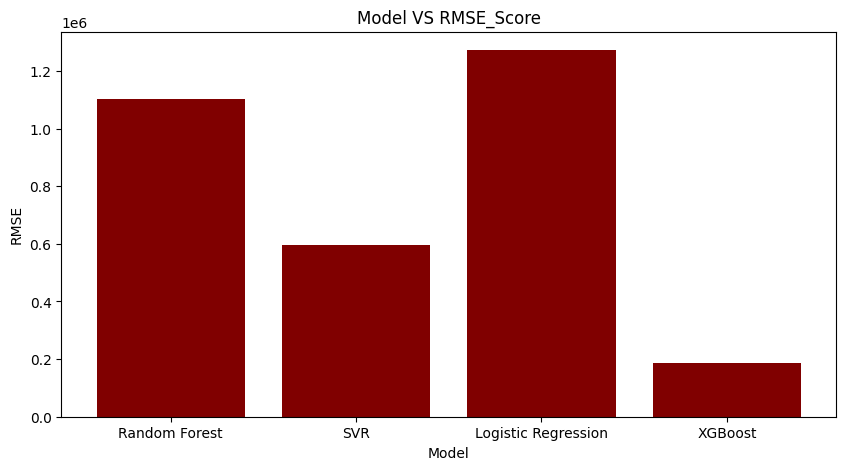

In [52]:
# import collections

# mse_list = collections.OrderedDict(mse_list)
# df = pd.DataFrame(list(mse_list.items()))
# df.columns = ['Model', 'RMSE']

# import plotly.express as plx

# fig = plx.bar(df, x='Model', y='RMSE')
# fig.show()

import matplotlib.pyplot as plt

figMat = plt.figure(figsize=(10, 5))
plt.bar(list(mse_list.keys()), list(mse_list.values()), color='maroon')

plt.xlabel("Model")
plt.ylabel("RMSE")
plt.title("Model VS RMSE_Score")

plt.show()



> ### Semi Supervised Learning



In [53]:
pd.options.display.float_format = '{:.6f}'.format

In [54]:
glob_pred

array([4153695.2, 4337692. , 4257481. , ..., 4259704. , 4260780. ,
       4325527.5], dtype=float32)

In [55]:
print(f"The Shape of the XTrain set  :  {X_train.shape}")
print(f"The Shape of the XTest set   :  {X_test.shape}")
print(f"The Shape of the yTrain set  :  {y_train.shape}")

print(f"The Shape of the glob_pred set  :  {len(glob_pred)}")
print(f"The Shape of the label_list set  :  {len(label_list)}")

The Shape of the XTrain set  :  (137, 44)
The Shape of the XTest set   :  (100000, 44)
The Shape of the yTrain set  :  (137,)
The Shape of the glob_pred set  :  100000
The Shape of the label_list set  :  100000


In [56]:
X_train.head()

,Id,City,City Group,Type,month,days,year,P1,P2,P3,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,31,0,2,6,16,3,0.154045,0.446850,-0.201271,...,-0.517620,0.050993,0.959953,0.823025,0.848783,1.863596,1.039680,1.013553,0.728835,1.610808
1,1,3,0,1,1,13,10,0.154045,0.446850,-0.201271,...,0.048149,0.050993,-0.666273,-0.680541,-0.657091,-0.726484,-0.653264,-0.701287,-0.678804,-0.707522
2,2,10,1,2,2,8,15,-0.783627,-0.166776,-2.238525,...,-1.254944,0.050993,-0.666273,-0.680541,-0.657091,-0.726484,-0.653264,-0.701287,-0.678804,-0.707522
3,3,28,1,2,1,1,14,0.873546,0.148580,1.361969,...,-0.220484,2.213252,2.970080,2.326591,1.723905,2.110807,2.558871,2.268904,2.136474,2.131841
4,4,14,1,2,4,8,11,-0.274863,-0.166776,-1.133147,...,-1.254944,0.050993,0.959953,0.187543,0.647034,0.911627,0.658085,1.013553,0.728835,1.300210


In [57]:
X_df = pd.concat([X_train, X_test], axis=0)

X_df.shape

(100137, 44)

In [58]:
X_df

,Id,City,City Group,Type,month,days,year,P1,P2,P3,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,31,0,2,6,16,3,0.154045,0.446850,-0.201271,...,-0.517620,0.050993,0.959953,0.823025,0.848783,1.863596,1.039680,1.013553,0.728835,1.610808
1,1,3,0,1,1,13,10,0.154045,0.446850,-0.201271,...,0.048149,0.050993,-0.666273,-0.680541,-0.657091,-0.726484,-0.653264,-0.701287,-0.678804,-0.707522
2,2,10,1,2,2,8,15,-0.783627,-0.166776,-2.238525,...,-1.254944,0.050993,-0.666273,-0.680541,-0.657091,-0.726484,-0.653264,-0.701287,-0.678804,-0.707522
3,3,28,1,2,1,1,14,0.873546,0.148580,1.361969,...,-0.220484,2.213252,2.970080,2.326591,1.723905,2.110807,2.558871,2.268904,2.136474,2.131841
4,4,14,1,2,4,8,11,-0.274863,-0.166776,-1.133147,...,-1.254944,0.050993,0.959953,0.187543,0.647034,0.911627,0.658085,1.013553,0.728835,1.300210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,4,1,1,0,4,5,0.509830,0.456501,-0.178779,...,-0.572591,0.107356,-0.650834,-0.656410,-0.653116,-0.699753,-0.635476,-0.675864,-0.665409,-0.673723
99996,99996,38,1,2,6,17,16,-1.561347,-1.861570,-0.178779,...,-1.352940,0.107356,1.197587,-0.656410,-0.653116,-0.699753,0.996384,-0.675864,-0.665409,-0.673723
99997,99997,54,0,2,11,28,17,0.114271,0.456501,-0.178779,...,0.530991,-1.285333,1.197587,1.792120,0.831142,1.037266,0.996384,1.107203,1.046646,1.054559
99998,99998,54,0,1,9,11,18,2.567545,1.873948,1.802696,...,1.922486,1.066222,-0.650834,-0.656410,-0.653116,1.756763,-0.635476,-0.675864,-0.665409,-0.673723


In [59]:
y_df = pd.concat([pd.Series(y_train), pd.Series(glob_pred)], axis = 0)

y_df.shape

(100137,)

In [60]:
y_df

0       5653753.000000
1       6923131.000000
2       2055379.000000
3       2675511.000000
4       4316715.000000
             ...      
99995   4325253.000000
99996   4215821.500000
99997   4259704.000000
99998   4260780.000000
99999   4325527.500000
Length: 100137, dtype: float64

In [61]:
Y_hat = pd.concat([pd.Series(y_train), pd.Series(label_list)], axis=0)

Y_hat.shape

(100137,)

In [62]:
X_df.head()

,Id,City,City Group,Type,month,days,year,P1,P2,P3,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,31,0,2,6,16,3,0.154045,0.446850,-0.201271,...,-0.517620,0.050993,0.959953,0.823025,0.848783,1.863596,1.039680,1.013553,0.728835,1.610808
1,1,3,0,1,1,13,10,0.154045,0.446850,-0.201271,...,0.048149,0.050993,-0.666273,-0.680541,-0.657091,-0.726484,-0.653264,-0.701287,-0.678804,-0.707522
2,2,10,1,2,2,8,15,-0.783627,-0.166776,-2.238525,...,-1.254944,0.050993,-0.666273,-0.680541,-0.657091,-0.726484,-0.653264,-0.701287,-0.678804,-0.707522
3,3,28,1,2,1,1,14,0.873546,0.148580,1.361969,...,-0.220484,2.213252,2.970080,2.326591,1.723905,2.110807,2.558871,2.268904,2.136474,2.131841
4,4,14,1,2,4,8,11,-0.274863,-0.166776,-1.133147,...,-1.254944,0.050993,0.959953,0.187543,0.647034,0.911627,0.658085,1.013553,0.728835,1.300210


In [63]:
# Calculating the 20% of the whole data shape
100137-100137*0.20

80109.6

In [64]:
mse_list

{'Random Forest': 1102013.5730952097,
 'SVR': 597154.016421862,
 'Logistic Regression': 1272738.178353772,
 'XGBoost': 186534.74170735298}

In [65]:
rmse_list = dict()


def FitModelSemiSuper(X, Y, model_name, model_algo, gridSearchParams, cv):
  """
    Fits a machine learning model using GridSearchCV and evaluates its
    performance.

    Parameters:
    X (array-like or DataFrame): Features dataset.
    y (array-like or Series): Target labels.
    model_name (str): Name of the model.
    model_algo (estimator object): The machine learning algorithm to train.
    gridSearchParams (dict): Dictionary with parameters names as keys and lists
    of parameter settings to try as values.
    cv (int or cross-validation generator): Determines the cross-validation
    splitting strategy.

    Returns:
    None
  """
  np.random.seed(10)

  print("\n" + "="*50)
  print(f"{' INFO ':^50}")
  print("="*50)
  print(f"{f' Model Name : {model_name} ':^50}")
  print(f"{f' Model Algorithm : {model_algo} ':^50}")
  print(f"{f' The Shape Of Input-X  : {X.shape} ':^50}")
  print(f"{f' The Shape Of Input-y  : {Y.shape} ':^50}")
  print(f"{f' Model Name : {model_name} ':^50}")
  print(f"{f' CV Value : {cv} ':^50}")
  print("="*50)


  # Split the dataset into training and testing sets
  X_train = X[0:80110]
  X_test = X[80110:]
  y_train = Y[0:80110]
  y_test = Y_hat[80110:]

  # Print the shapes of the training and testing datasets
  print("\n" + "="*50)
  print(f"{' DATA SPLITTING ...':^50}")
  print("="*50)
  print(f"The Shape of X_train  :  {X_train.shape}")
  print(f"The Shape of X_test  :  {X_train.shape}")
  print(f"The Shape of y_train  :  {y_train.shape}")
  print(f"The Shape of y_test  :  {y_test.shape}")

  grid = GridSearchCV(
      estimator=model_algo,
      param_grid=gridSearchParams,
      cv = cv,
      verbose = 1,
      n_jobs = -1
  )

  # Print the start of training
  print("\n" + "="*50)
  print(f"{' TRAINING STARTED ..':^50}")
  print("="*50)

  # Fit the model
  grid_result = grid.fit(X_train, y_train)
  best_params = grid_result.best_params_
  pred = grid_result.predict(X_test)

  # Calculate Root Mean Squared Error (RMSE)
  rmse = sqrt(mean_squared_error(y_test, pred))

  # Placeholder for test labels, needs to be defined or passed
  label_list = test_lablel['Prediction'].tolist()

  print("\n" + "="*50)
  print(f"{' TRAINING RESULTS ...':^50}")
  print("="*50)
  print(f"Best Parameters: {best_params}")
  print(f"Root Mean Squared Error on validation set: {rmse:.4f}")

  # Predict on the entire test set
  pred_test = grid_result.predict(X_test)
  glob_pred = pred_test
  diff_btwn_true_and_pred = label_list - pred_test

  # Concatenate predictions, original labels, and their differences
  concat_pred_test_and_label_list = pd.concat(
      [pd.Series(pred_test),
        pd.Series(label_list),
       pd.Series(diff_btwn_true_and_pred)],
      axis=True)
  concat_pred_test_and_label_list.columns = ['Predicted Data',
                                             'Original Data', 'Diff']

  # Root Mean Squared Error on original test data
  rmse_O = sqrt(mean_squared_error(label_list, pred_test))

  # Print RMSE on the original test data
  print("\n" + "="*50)
  print(f"{' TEST RESULTS ...':^50}")
  print("="*50)
  print(f"Root Mean Squared Error on original test data: {rmse_O:.4f}")

  # Save RMSE to mse_list
  mse_list[model_name] = sqrt(mean_squared_error(label_list, pred_test))

  # Print prediction comparison
  print("\n" + "="*50)
  print(f"{' PREDICTION VS ORIGINAL [TOP 5] ...':^50}")
  print("="*50)
  print(concat_pred_test_and_label_list.head())


pd.options.display.float_format = '{:.2f}'.format



>> ### Train and Evaluation





>>> ## *Random Forest*



In [ ]:
params = {
    'n_estimators': [50, 100, 150, 300, 500, 700, 1000, 2000]
}
model_name = 'Random Forest'
model_algo = RandomForestRegressor()
cv = 5

FitModelSemiSuper(
    X_df,
    y_df,
    model_name,
    model_algo,
    params,
    cv
)


                       INFO                       
            Model Name : Random Forest            
    Model Algorithm : RandomForestRegressor()     
       The Shape Of Input-X  : (100137, 44)       
        The Shape Of Input-y  : (100137,)         
            Model Name : Random Forest            
                   CV Value : 5                   

                DATA SPLITTING ...                
The Shape of X_train  :  (80110, 44)
The Shape of X_test  :  (80110, 44)
The Shape of y_train  :  (80110,)
The Shape of y_test  :  (20027,)

                TRAINING STARTED ..               
Fitting 5 folds for each of 8 candidates, totalling 40 fits




>>> ## *SVR*



In [ ]:
params = {
    'C': [0.1, 1, 100, 1000],
    'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
}
model_name = 'SVR'
model_algo = SVR()
cv = 5

FitModel(X_df,
         y_df,
         model_name=model_name,
         model_algo=model_algo,
         gridSearchParams=params,
         cv=cv)



>>> ## *Linear Regressor*





>>> ## *XGBoost*



In [ ]:
import plotly.express as plx
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='Supervised', x=list(mse_list.keys()), y=list(mse_list.values())),
    go.Bar(name='Semi-Supervised', )
])